<a href="https://colab.research.google.com/github/NivedithaGunapati/G7_DS/blob/main/Mini%20Projects/Niveditha/Movie_classification_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("Movie_classification.csv")
df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,NO,186.96,243.584,Action,27,561,44800,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,YES,132.24,263.296,Action,20,600,41200,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,NO,109.56,243.824,Comedy,31,576,47800,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,YES,158.80,303.520,Comedy,47,607,44000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [ ]:
df.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510,0.545455
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764,0.498422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000,1.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000


In [ ]:
df['Time_taken'].fillna(value=df['Time_taken'].mean(),inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

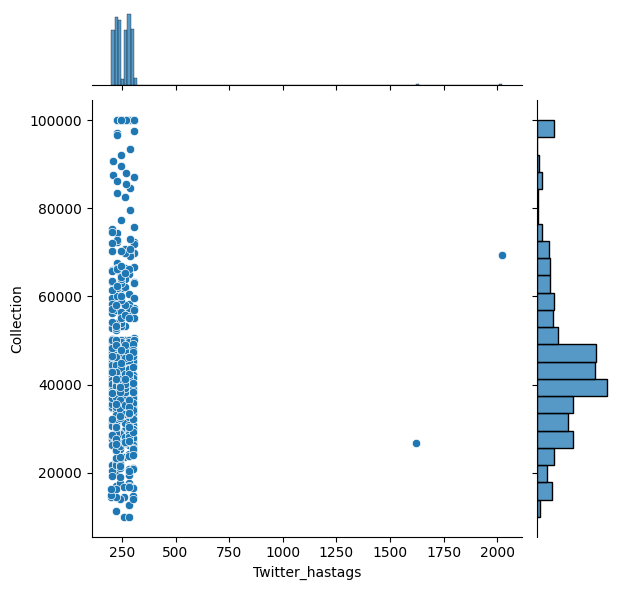

In [ ]:
sns.jointplot(x="Twitter_hastags", y="Collection",data=df)

In [ ]:
#w1=np.percentile(df.Twitter_hastags,[99])[0]

In [ ]:
#w1

In [ ]:
# df[df.Twitter_hastags>w1*2]

In [ ]:
#df[df.Twitter_hastags>w1*2]=w1

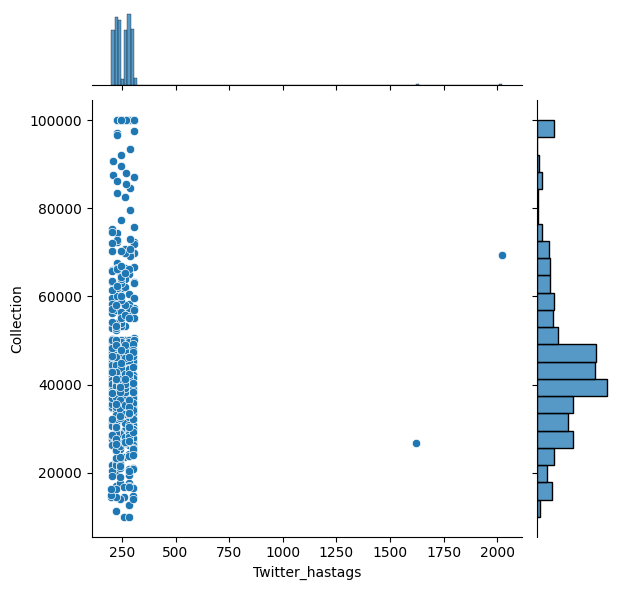

In [ ]:
sns.jointplot(x="Twitter_hastags", y="Collection",data=df)

In [ ]:
df=pd.get_dummies(df,columns=["Genre","3D_available"],drop_first=True)

In [ ]:
#df=df.drop(['3D_available_NO'], axis=1)

In [ ]:
df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,0,0,1,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,1,0,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,1,0,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,0,1,0,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,...,186.96,243.584,27,561,44800,0,0,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,...,132.24,263.296,20,600,41200,0,0,0,0,1
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,...,109.56,243.824,31,576,47800,0,1,0,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,...,158.80,303.520,47,607,44000,0,1,0,0,1


In [ ]:
df["Start_Tech_Oscar"].unique()

array([1, 0])

In [ ]:
#list1=[307.9904]
#df1=df[df.Start_Tech_Oscar.isin(list1) == False]
#df1

In [ ]:
df['Start_Tech_Oscar'].unique()

array([1, 0])

In [ ]:
df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,0,0,1,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,1,0,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,1,0,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,0,1,0,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,...,186.96,243.584,27,561,44800,0,0,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,...,132.24,263.296,20,600,41200,0,0,0,0,1
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,...,109.56,243.824,31,576,47800,0,1,0,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,...,158.80,303.520,47,607,44000,0,1,0,0,1


In [ ]:
X=df.loc[:,df.columns!="Start_Tech_Oscar"]
Y=df["Start_Tech_Oscar"]

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=324)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
movie_classifier=DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)

In [ ]:
movie_classifier.fit(X_train,Y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [ ]:
from sklearn import tree
Decision=tree.DecisionTreeClassifier(max_depth=3)
Decision.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_test_pred=Decision.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
accuracy_score(Y_test,y_test_pred)

0.5882352941176471

In [ ]:
confusion_matrix(Y_test, y_test_pred)

array([[44,  5],
       [37, 16]])

In [ ]:
tree= tree.DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag= BaggingClassifier(base_estimator=tree,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=2)

In [ ]:
bag.fit(X_train,Y_train)
accuracy_score(Y_test,bag.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.6372549019607843

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfs

In [ ]:
random= rfs(n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=2)

In [ ]:
random.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=2)

In [ ]:
accuracy_score(Y_test,random.predict(X_test))

0.6764705882352942

In [ ]:
confusion_matrix(Y_test, y_test_pred)

array([[44,  5],
       [37, 16]])